**Оглавление**

1. [Описание проекта](#1)
1. [Задачи](#2)
1. [Описание данных](#3)
1. [Загрузка данных и подготовка их к анализу](#4)
1. [исследовательский анализ данных (EDA)](#5)
1. [Постройте модель прогнозирования оттока клиентов](#6)

  6.1[Логистическая регрессия](#6.1)
  
  6.2[Cлучайный лес](#6.2)
 
1. [Кластеризация](#7)
1. [Общие выводы](#8)

# Описание проекта <a id ='1'> </a>
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. 


# Задачи<a id ='2'> </a>

1) Провести исследовательский анализ данных (EDA)

 - Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());
 - Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());
 - Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
 - Постройте матрицу корреляций и отобразите её.

2) Постройте модель прогнозирования оттока клиентов
 
Постройте модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:

- Разбейте данные на обучающую и валидационную выборку функцией train_test_split().
- Обучите модель на train-выборке двумя способами:

  - логистической регрессией,
  
  - случайным лесом.
  
- Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?


3) Сделайте кластеризацию клиентов
 
Отложите в сторону столбец с оттоком и проведите кластеризацию объектов (клиентов):

- Стандартизируйте данные.
- Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму.
- Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5.
- Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?
- Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?
- Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

4) Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами

 - Сформулируйте основные выводы и предложите рекомендации для стратегии взаимодействия с клиентами и их удержания.

# Описание данных <a id ='3'> </a>

Набор данных включает следующие поля:

    Churn — факт оттока в текущем месяце;
    
Текущие поля в датасете:

   Данные клиента за предыдущий до проверки факта оттока месяц:
        
            gender — пол;
            
            Near_Location — проживание или работа в районе, где находится фитнес-центр;
            
            Partner — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
            
            Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
            
            Phone — наличие контактного телефона;
            
            Age — возраст;
            
            Lifetime — время с момента первого обращения в фитнес-центр (в месяцах).
            
            
Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:

        Contract_period — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
            
        Month_to_end_contract — срок до окончания текущего действующего абонемента (в месяцах
        
        Group_visits — факт посещения групповых занятий;
        
        Avg_class_frequency_total — средняя частота посещений в неделю за все время с начала действия абонемента;
        
        Avg_class_frequency_current_month — средняя частота посещений в неделю за предыдущий месяц;
        
        Avg_additional_charges_total — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

# Загрузка данных и подготовка их к анализу <a id ='4'> </a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.simplefilter("ignore")

Загрузим исходную таблицу:

In [2]:
gym_churn = pd.read_csv('https://code.s3.yandex.net/datasets/gym_churn.csv')

Посмотрим на количество записей и столбцов:

In [3]:
gym_churn.shape

(4000, 14)

In [4]:
gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


Пропусков нет - количество информации во всех столбцах одинаковое!

In [5]:
gym_churn.head(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Видим, что информация в столбцах, как бинарная, так и мультиклассификационная. Описание столбцов было в начале задания. 

Посмотрим на дубликаты:

In [6]:
gym_churn.duplicated().sum()

0

**Вывод:** Данные сформированы очень хорошо, каких-либо манипуляций по предобработке делать не пришлось. Единственное, что в столбце Age **хотелось бы знать кто есть кто?** (женщин или мужчин приняли за 0).

# Исследовательский анализ данных (EDA) <a id= 5></a>

Проведем исследовательский анализ данных.

Первым делом посмотрим на основные характеристики 

In [7]:
gym_churn.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


В целом данные распределены в пропорциях 50/50 (для бинарных столбцов). Из интересного можно отметить:
 1) что у 85% клиентов рядом с фитнесс - центром все же есть какой то объект их социальной жизни (дом или работа);
 
 2) 30% пришло по приглашению от друзей. Очень приличный показатель!
 
 3) Средний абонемент берется примерно на 9 месяцев;
 
 4) В целом уходит 26,5 % ( не приходит заниматься в текущем месяце). Не уверен на счет много это или мало, однако считаю нужным на это обратить внимание и дать рекомендации по снижению убыли; 
 

Сгруппируем данные по столбцу 'Churn' и посмотрим цбыль клиентов в зависимости от других столбцов:

In [8]:
gym_churn.groupby('Churn').agg('mean').T

Churn,0,1
gender,0.510037,0.510839
Near_Location,0.873086,0.768143
Partner,0.534195,0.355325
Promo_friends,0.353522,0.183789
Phone,0.903709,0.902922
Contract_period,5.747193,1.728558
Group_visits,0.464103,0.268615
Age,29.976523,26.989632
Avg_additional_charges_total,158.445715,115.082899
Month_to_end_contract,5.283089,1.662582


Не очень наглядно - построим гистограммы:

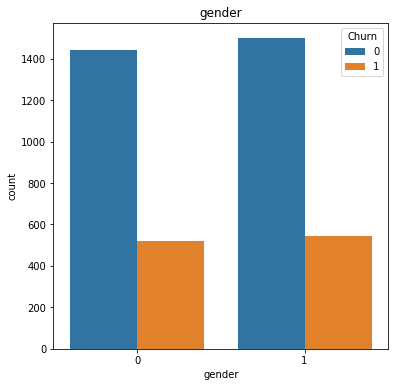

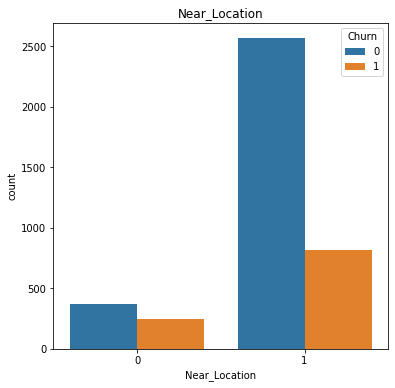

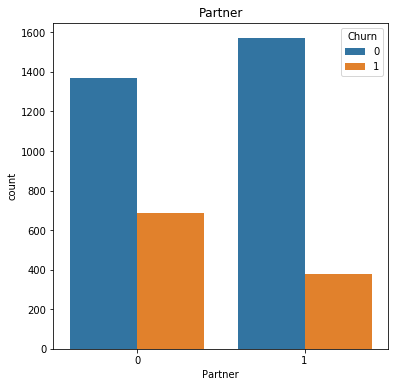

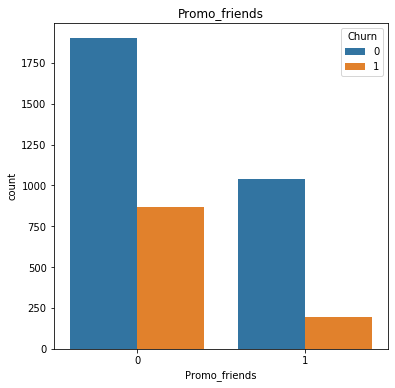

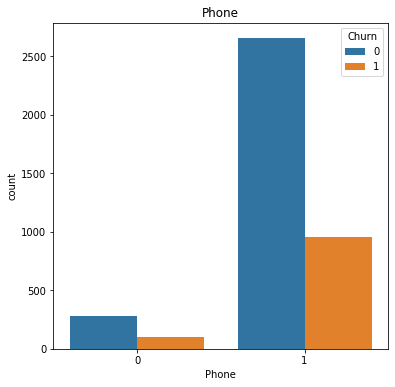

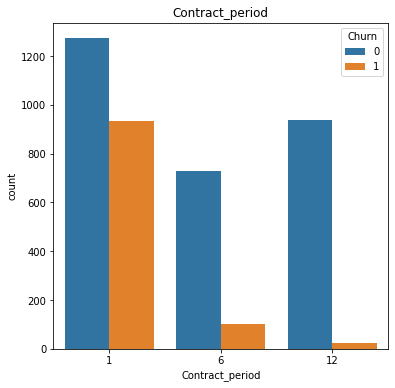

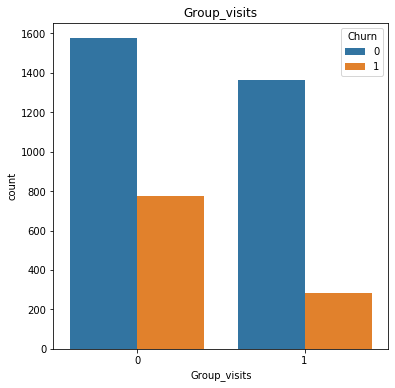

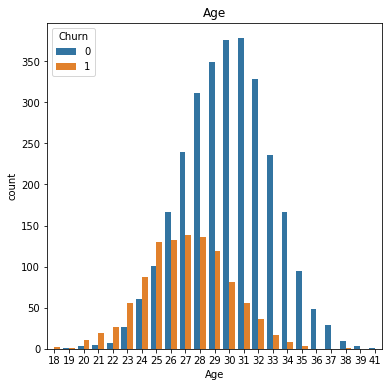

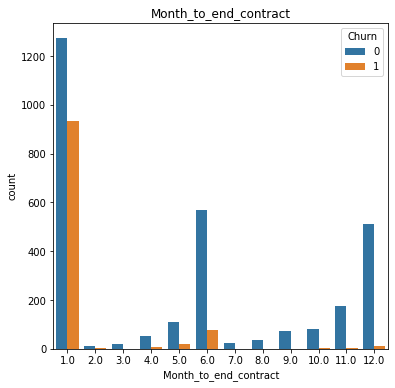

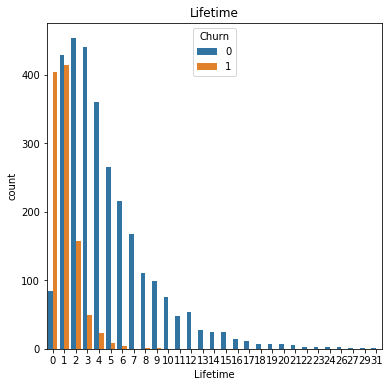

In [9]:
for col in gym_churn.drop(['Churn', 
                           'Avg_additional_charges_total', 
                           'Avg_class_frequency_total',
                           'Avg_class_frequency_current_month'], axis = 1).columns: # убрал эти
# столбцы, так они очень сильно грузили расчет ( с этими стобцами далее построены боксплоты)
    plt.figure(figsize=(6, 6))
    sns.countplot(x = gym_churn[col], hue='Churn', data=gym_churn)
    plt.title(col)
    plt.show()



1) Женщины и мужчины в равной степени подвержены уходу;

2) Близость к спорт залу влияет очень сильно. Люди которые работают, либо живут близко остаются чаще. Те, которые живут дальше, примерно в равных долях остаются/уходят;

3) Партнеры зала в равной степени уходят / остаются;

4) Люди пришедшии по акции "приведи друга" удерживаются лучше. Вероятно акция была действительно выгодной. Пришедших самостоятелььно больше, но и уходят они в половине случаев. ДУмаю дополнительным фактором влияется факт наличия знакомого в зале - вдвоем/троем... комфортнее!

5) Самый большой отток в первый месяц - порядка 75%, 6 и 12 месяцев  практически остаются все. Сходно и с временем до окончания абонимента( более 75%) - нне дохаживают последний месяц;

6) Люди, не посещавшие групповые занятия с большей вероятностью уходят;

7) Людей ушедших до 24 лет больше чем остающихся. Далее чем старше - тем вероятность уходя все более стремится на 0;

8) Люди активно уходят спустя первые 2 месяца, далее быстро идет на спад.

Боксплоты:

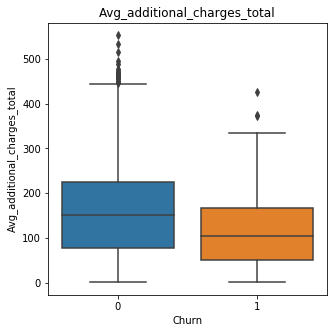

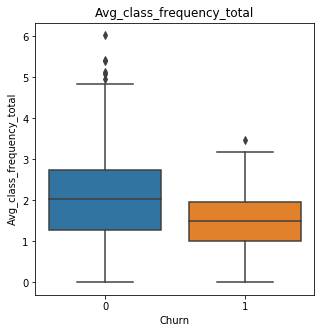

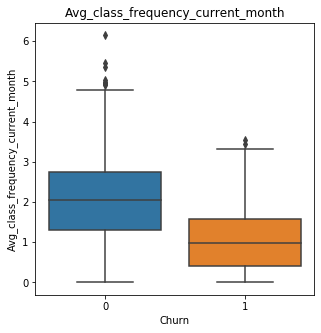

In [10]:
for col in ['Avg_additional_charges_total',
            'Avg_class_frequency_total',
            'Avg_class_frequency_current_month']:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x ='Churn', y =gym_churn[col], data=gym_churn)
    plt.title(col)
    plt.show()


Выбивающегося не увидел.

Построим тепловую карту с матрицией корреляции для данных из дата фрейма gym_churn

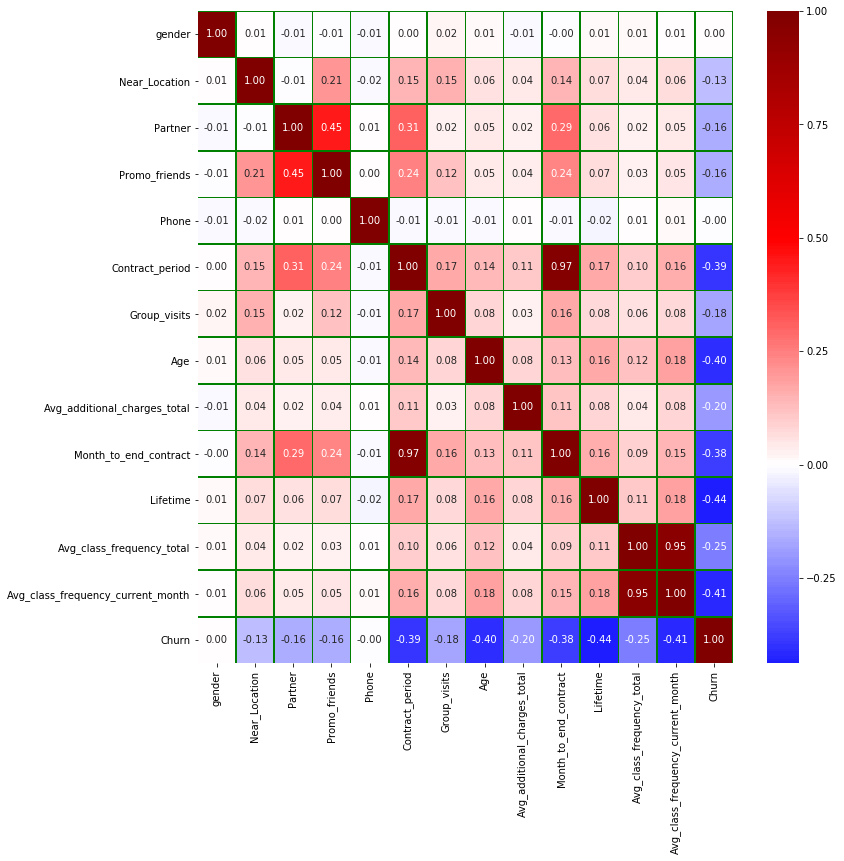

In [11]:
corr = gym_churn.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, 
            annot = True, linecolor ='green', 
            fmt = '0.2f', 
            linewidths=.6, 
            center = 0, 
            cmap="seismic"
           )
plt.show()

Видно 4 коррелирующих между собой столбца:

1) `Month_to_end_contract` и `Contract_period`. Месяцы до окончания абонемента и его текущая длительность;

2) `Avg_class_frequency_current_month` и `Avg_class_frequency_total`средняя частота посещений в неделю в текущем месяце и средняя посещаемость за все время;

Вообщем то ничего удивительного.

**Вывод:** обнаружено что некоторые группы лучше или хуже удерживаются. есть 2 выборки 
по 2 столбца коррелирующих между собой

# Модель прогнозирования оттока клиентов <a id ='6'></a>

Разделим наши данные на признаки (матрица X) и целевую переменную (y)

In [12]:
X = gym_churn.drop('Churn', axis = 1)
y = gym_churn['Churn']

Разделяем модель на обучающую и валидационную выборку:

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Далее рассмотрим два варианта машинного обучения(логистическая и случайный лес)

# Логистическая регрессия <a id ='6.1'></a>

Создадим объект класса LogisticRegression и применим его к обучающей выборке:

In [14]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
probabilities =  model.predict_proba(X_test)[:,1]

Посмтоим результаты по основным характеристикам:

In [15]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Accuracy: 0.93
Precision: 0.86
Recall: 0.83
F1: 0.85


Доля верно угаданных ответов из всех прогнозов 93%

Доля правильных ответов только среди целевого класса 86%

Сколько реальных объектов "1" класса вы смогли обнаружить 83%

сводная метрика, учитывающая баланс между Precision и Recall - 85%

вполне приличные результаты.

Посмотрим на то что покажет случайный лес:

# Cлучайный лес <a id ='6.2'></a>

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st) 
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

In [17]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))

Accuracy: 0.92
Precision: 0.84
Recall: 0.81
F1: 0.83


Доля верно угаданных ответов из всех прогнозов 92%

Доля правильных ответов только среди целевого класса 84%

Сколько реальных объектов "1" класса вы смогли обнаружить 81%

сводная метрика, учитывающая баланс между Precision и Recall - 83%

Результаты так же вполне приличные, однако немного хуже чем при логистической регрессии:

**Вывод:** Будем пользоваться моделью с логистической регрессией, при условии что угаданных ответов было 93% можно очень точно предсказывать уход клиентов. При условии, что уходят 27% можно попробовать сохранить большую их долю!

# Кластеризация  <a id ='7'></a>

В данном разделе проведем кластеризацию пользователей:

In [18]:
sс = gym_churn.drop(['Churn'], axis=1)
column = sс.columns
sс = StandardScaler().fit_transform(sс)
sс = pd.DataFrame(sс, columns = column).astype('float64')

In [19]:
linked = linkage(sс, method = 'ward')

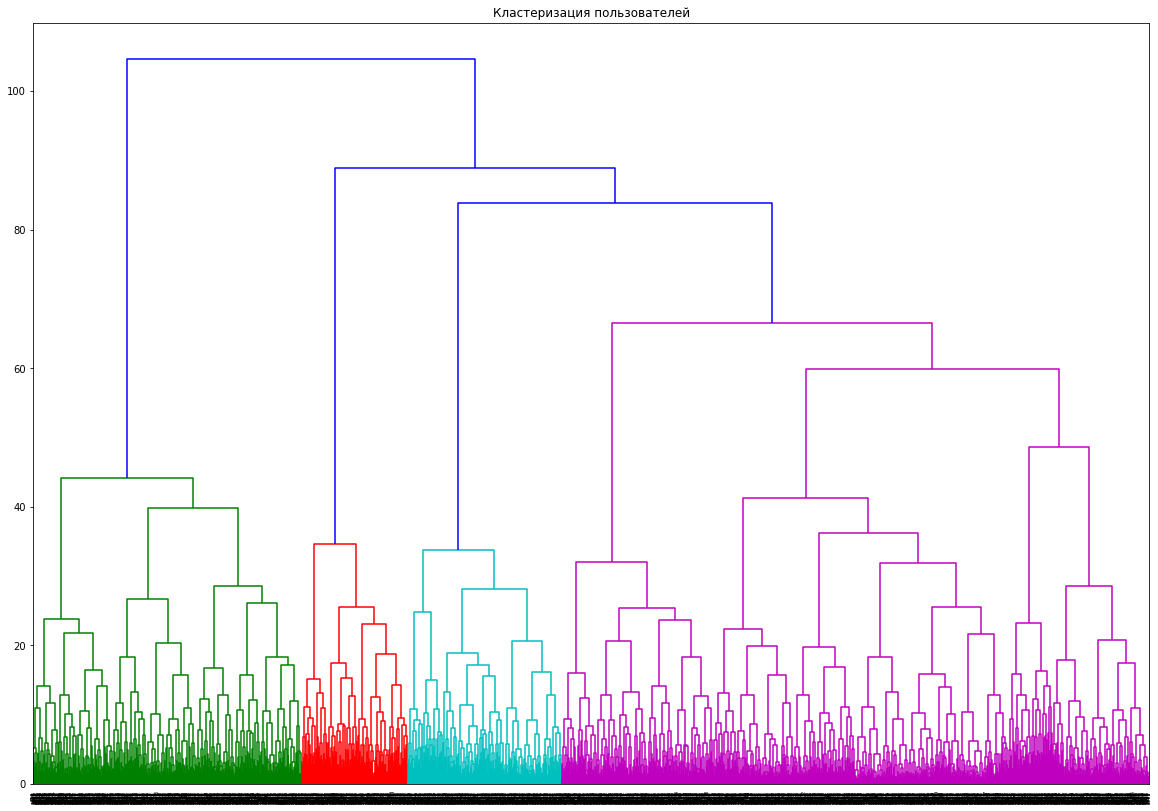

In [20]:
plt.figure(figsize=(20, 14))  
dendrogram(linked, orientation = 'top')
plt.title('Кластеризация пользователей')
plt.show()

Примем что кластеров будет 5 ( так же было в исходном задании):

Кластеризуем:

In [21]:
km = KMeans(n_clusters = 5, random_state = 0)
labels = km.fit_predict(sс)
gym_churn['cluster'] = labels
gym_churn.cluster.value_counts()

3    1262
0    1011
4     837
2     505
1     385
Name: cluster, dtype: int64

Постороим таблицу с кластерами:

In [22]:
gym_churn.groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.502473,0.522078,0.495050,0.485737,0.560335
Near_Location,0.959446,0.862338,0.000000,1.000000,0.976105
Partner,0.783383,0.470130,0.463366,0.350238,0.356033
Promo_friends,0.574679,0.306494,0.079208,0.240095,0.229391
Phone,1.000000,0.000000,1.000000,1.000000,0.998805
Contract_period,10.884273,4.787013,2.352475,1.948494,2.665472
Group_visits,0.543027,0.425974,0.215842,0.341521,0.473118
Age,29.980218,29.301299,28.477228,28.167987,30.127838
Avg_additional_charges_total,160.706969,143.957664,135.457501,131.622204,161.724258
Month_to_end_contract,9.950544,4.475325,2.198020,1.856577,2.455197


Не очень наглядно, псотроим гистограммы:

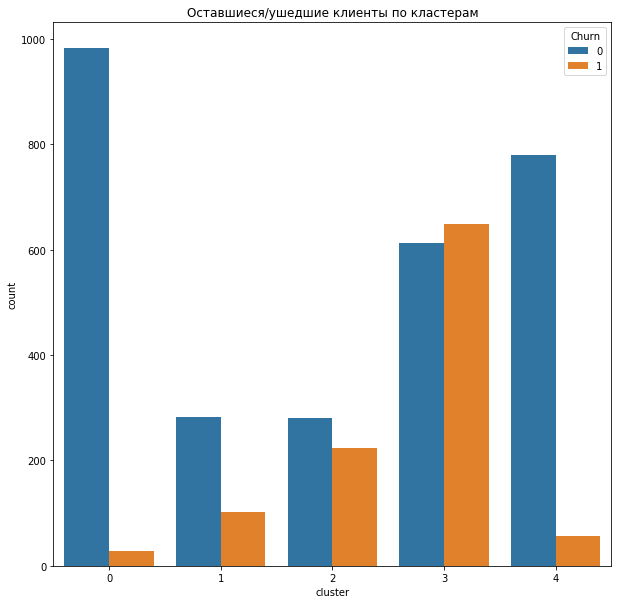

In [23]:
plt.figure(figsize=(10, 10))
sns.countplot(x = gym_churn['cluster'], hue='Churn', data=gym_churn)
plt.title('Оставшиеся/ушедшие клиенты по кластерам')
plt.show()

В третьем кластере уходящих клиентов больше чем приходящих, если посмотреть на сводную таблицу - могу предположить что это клиенты у которых до конца абонимента осталлось 2 месяца и срок их абонимента тоже 2 месяца... не понравилось в зале?

Во 2 кластере практически одинаково уходят/остаются по тем же параметрам

Это самые убегающие!

Лучше всех 4 кластер - самые долгие по времени посещения , посещают в 55% случаев групповые занятия (лучше всех) и до конца абонемента в среднем 10 месяцев. Видимо это клиенты, которые не первый год посещает фитнесс центр. Первый и второй близки к 4 му

Посмотрим уходящих/остающихся по кластерам в зависмости от разныхс толбцов:

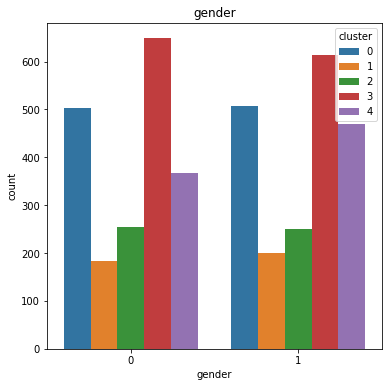

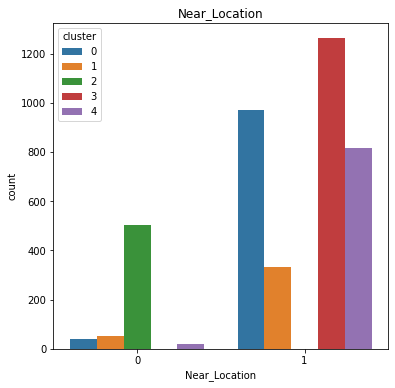

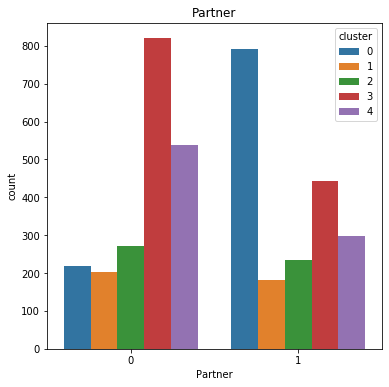

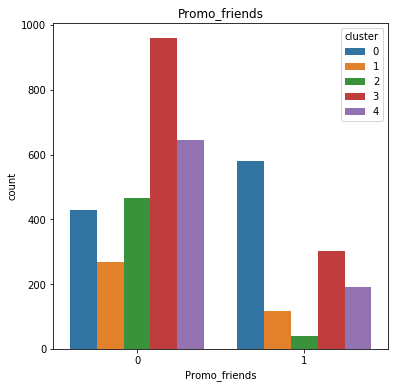

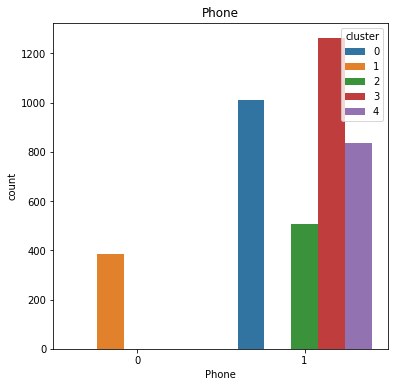

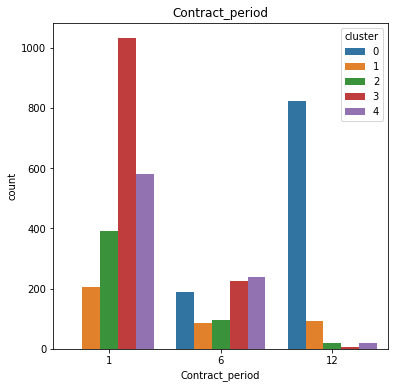

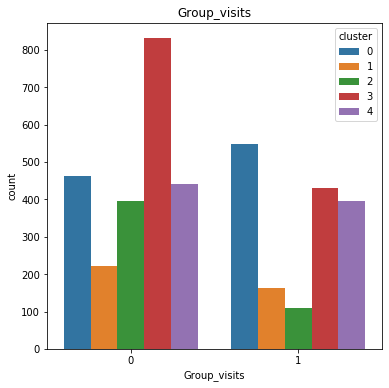

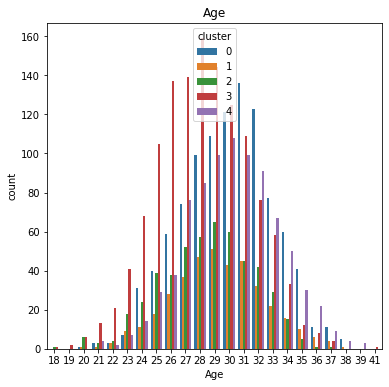

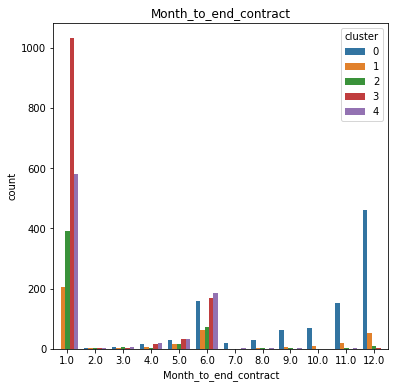

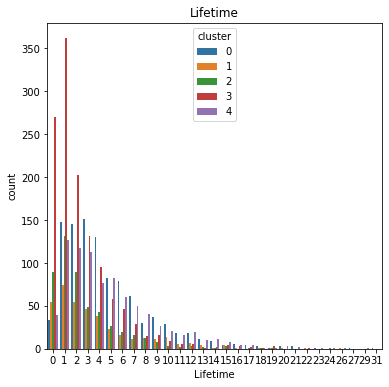

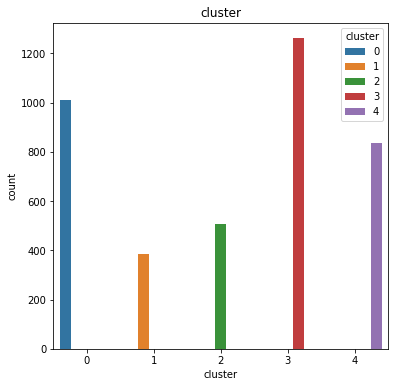

In [24]:
for col in gym_churn.drop(['Churn', 
                           'Avg_additional_charges_total', 
                           'Avg_class_frequency_total',
                           'Avg_class_frequency_current_month'], axis = 1).columns:
    plt.figure(figsize=(6, 6))
    sns.countplot(x = gym_churn[col], hue='cluster', data=gym_churn)
    plt.title(col)
    plt.show()

Стоит заметить , что третий класс самый большой (не критично) ( последний график). В большинстве случаев люди попавшие в этот кластер в топе по уходящим, что было замечаное еще на гистограмме "Оставшиеся/ушедшие клиенты по кластерам" . Эти график это подтверждают.

Посмотрим на боксплоты для столбцов с avg.

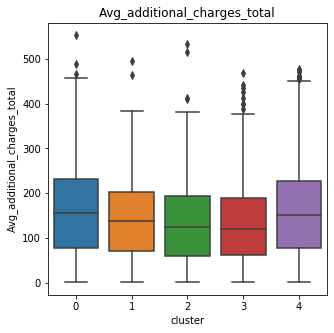

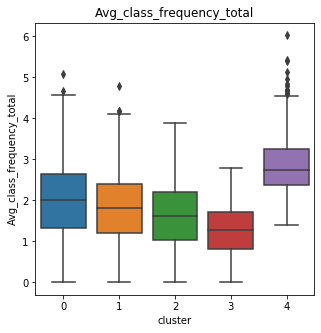

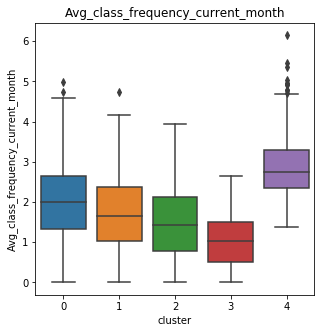

In [25]:
for col in ['Avg_additional_charges_total',
            'Avg_class_frequency_total',
            'Avg_class_frequency_current_month']:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x ='cluster', y =gym_churn[col], data=gym_churn)
    plt.title(col)
    plt.show()

2 кластер чаще всех посещает зал !

**Выод:** стоит обратить особое внимание на кластеры 0 и 3!

# Обшие выводы <a id= '8'></a> 

Наибольшие проблеммы наблюдаются с людьми у которых абонементы подходят к концу при этом они заведомо вновь приходящие (маленький лайф тайм) - вероятно людей что то неустроило, однако думаю причина более прозаична: банально не хочется ходить в зал, а этот поход был экспериментальным (очередным желаниям начать ходить заниматься) с такого рода людьми сложно что то сделать - фитнесс это не их дело. Поэтому целесообразно оставаться работать с кластерами старых и проверенных клиентов (1,2,4):

1) Мотивировать оставаться с клубом (делать скидки при продлении абонимента);

2) Создавать/обновлять групповые программы -людям это интересно;

3) Размещать рекламу в ближайщих офисах и тц. Для людей это имеет большее значение!

4) Для будущих исследований поробовать сделать кластеризацию больше, так же собирать больше информации - вероятно получится найти больше точек удержания для вновь приходящих.